该Notebook演示了整个Data Mining Process(问题提出-->数据理解-->数据准备-->建模-->评估）的整个过程。

参考https://github.com/donnemartin/data-science-ipython-notebooks/tree/master/kaggle
制作。

# 预测泰坦尼克幸存者

* 认识任务和数据集
* EDA（Exploratory Data Analysis）
* 数据准备
* 训练和预测
* 模型评估

## 数据集描述

<pre>
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
</pre>

## Setup Imports and Variables

In [697]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(10, 5))
fizsize_with_subplots = (10, 10)
bin_size = 10

## Explore the Data

In [698]:
df_train = pd.read_csv('./titanic-data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [699]:
print("Passenger count %s" %len(df_train))
df_train.tail()

Passenger count 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [700]:
# 数据类型
print(df_train.dtypes, end='\n\n\n')
print(type(df_train['Name']))
type(df_train['Name'][0])

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


<class 'pandas.core.series.Series'>


str

在DataFrame中，String类型为‘object’.

In [701]:
# 获取数据表基本信息
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Age, Cabin, 和 Embarked 三个属性包含缺失值.  Cabin缺失值过多（超过75%），因此不考虑该属性。Age 和 Embarked 考虑通过数据表中数据的分布进行填充.

In [702]:
# 描述数据表中，各属性的统计量。
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<u>更进一步地，探索数据的每一个属性，判断需要选择哪些属性，有无缺省值，是否需编码（Feature Engineering）。</u>

Text(0.5,1,'Age Histogram')

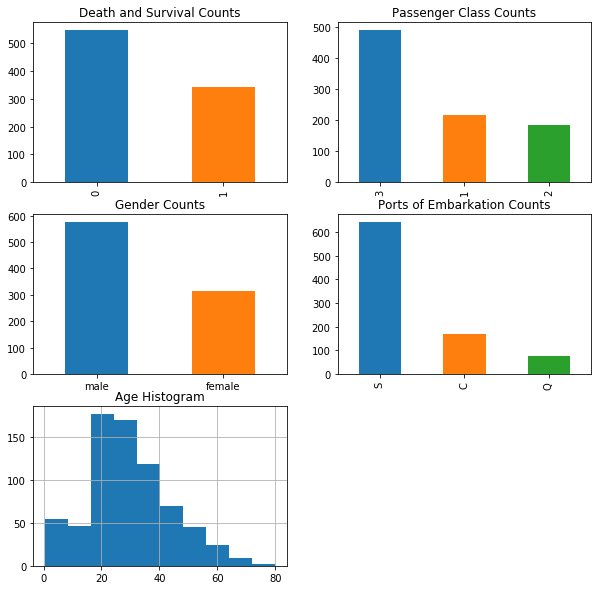

In [703]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts')
# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar', 
                                       title='Passenger Class Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df_train['Embarked'].value_counts().plot(kind='bar', 
                                         title='Ports of Embarkation Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
df_train['Age'].hist()
plt.title('Age Histogram')

接下来，分析每一个属性对存活率的影响。

## Feature: Passenger Classes

三种乘客船舱级别: First, Second, and Third.  分析每种级别存活率下的存活率（Pclass, Survived）交叉表。

In [704]:
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [705]:
# Normalize the cross tab to sum to 1 (1 for row-wise summation, 0 for column-wise summation):
# div function, element-wise floating division of dataframe
# pclass_xt_pct = pclass_xt.div(pclass_xt.sum(axis=1), axis=0)
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(axis=1),\
                              axis='index')
print(pclass_xt_pct)

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


<font color=red> 注意，sum操作中的axis=1表示行向求和，而pandas中的axis=0表示行向元素除法操作，例如本例中对第一行数据而言，在div除法运算中，是用第一行的两个元素分别除以对应的sum值<font>

Text(0,0.5,'Survival Rate')

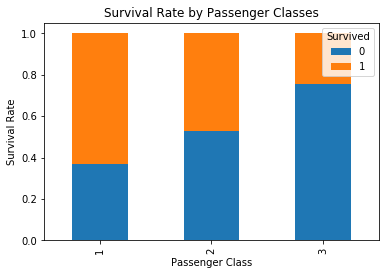

In [706]:
pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

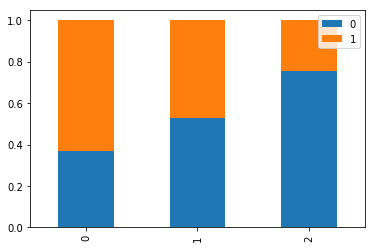

In [707]:
# 作为对比，上述过程类似以下
arr = np.array([[0.370370, 0.629630], [0.527174, 0.472826], \
               [0.757637, 0.242363]])
df = pd.DataFrame(arr)
df.plot(kind='bar', stacked=True)

交叉表分布表明仓位级别Pclass对存活率分布有重要影响，因此选择该属性。

## Feature: Sex

接下来分析性别属性，性别属性需要由categorical数据映射到数值型。

In [708]:
sexes = sorted(df_train['Sex'].unique())
print(sexes)
#  zip function, 打包元组（性别，数值）
genders_mapping = dict(zip(sexes, range(0, len(sexes)+1)))
genders_mapping

['female', 'male']


{'female': 0, 'male': 1}

创建新列Sex_Val，将原Sex属性由字符串转换为数值类型

In [709]:
df_train['Sex_Val'] = df_train['Sex'].map(genders_mapping)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


通过（Sex_Val，Survived）交叉表分析性别属性对存活率的影响。

Survived    0    1
Sex_Val           
0          81  233
1         468  109


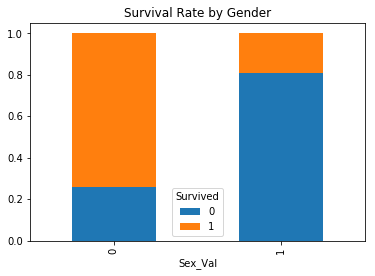

In [710]:
sex_val_xt = pd.crosstab(df_train['Sex_Val'], df_train['Survived'])
print(sex_val_xt)
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(axis=1), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender')

大部分女性都活了下来，大部分男性未存活。
看来Sex属性也要保留。

再细化一点，分析不同性别中，不同仓位的存活状况。
计算每个Pclass下男女性人数。

In [711]:
# Get the unique values of Pclass:
passenger_classes = sorted(df_train['Pclass'].unique())
print(passenger_classes)
for p_class in passenger_classes:
    print('M: ', p_class, len(df_train[(df_train['Sex'] == 'male') & 
                             (df_train['Pclass'] == p_class)]))
    print('F: ', p_class, len(df_train[(df_train['Sex'] == 'female') & 
                             (df_train['Pclass'] == p_class)]))

[1, 2, 3]
M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


交叉表（sex=female, Survived）和（sex=male, Survived）数据分析

Text(0,0.5,'Survival Rate')

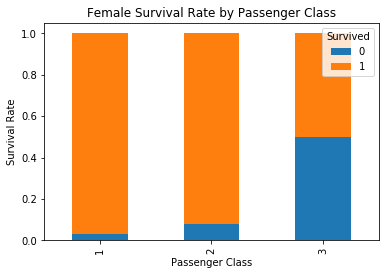

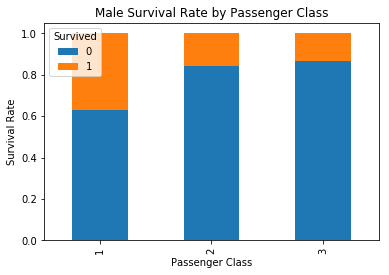

In [712]:
# Plot survival rate in females by Pclass 
females_df = df_train[df_train['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], df_train['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Plot survival rate in males by Pclass
males_df = df_train[df_train['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], df_train['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

绝大多数一二等级的女性乘客都存活下来。从船舱等级而言，First class的男乘客最可能活下来。

## Feature: Embarked

Embarked是categorical类型的数据['Q', 'C', 'S']，且存在缺失值。

1. 对Embarked属性取值进行编码，转换为数值型数据。
2. 缺失值填充。

In [713]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [714]:
# Get the unique values of Embarked
# use missing to fill the missing 'Embarked' attributes
embarked_locs = sorted(df_train['Embarked'].fillna("missing").unique())
embarked_locs_mapping = dict(zip(embarked_locs, 
                                 range(0, len(embarked_locs) + 1)))
embarked_locs_mapping

{'C': 0, 'Q': 1, 'S': 2, 'missing': 3}

In [715]:
# 创建数值型新列Embarked_Val，且不含缺失值
df_train['Embarked_Val'] = df_train['Embarked'].fillna("missing") \
                               .map(embarked_locs_mapping)
# 查看是否仍有缺失值
df_train[df_train['Embarked_Val'].isnull()]
print(df_train['Embarked_Val'].unique())

[2 0 1 3]


Text(0,0.5,'Count')

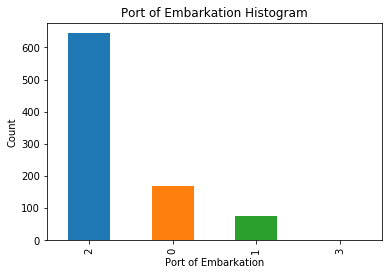

In [716]:
df_train['Embarked_Val'].value_counts().plot(kind='bar')
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')

直接用missing填充缺失值未免过于简单粗暴。
'S': 3对应的数量最多（众数），因此对于缺失的Embarked，用'S'填充，即Embarked_Val对应用embarked_locs_mapping['S']填充

In [717]:
# use mode to fill missing values of feature Embarked
# 在'Embarked_Val'列找到"missing"对应的值，在此处是3，将其替换为’S‘对应的值，即2
print(df_train['Embarked_Val'][61])
print("未替换前index=61和829处的值分别为%s %s" \
      %(df_train['Embarked_Val'][61], df_train['Embarked_Val'][829]))
if len(df_train[df_train['Embarked'].isnull()] > 0):
      df_train.replace({'Embarked_Val' : 
                   { embarked_locs_mapping["missing"] : 
                        embarked_locs_mapping['S'] 
                   }
               }, 
               inplace=True)
print("替换后index=61和829处的值分别为%s %s"\
      %(df_train['Embarked_Val'][61], df_train['Embarked_Val'][829]))

3
未替换前index=61和829处的值分别为3 3
替换后index=61和829处的值分别为2 2


确认Embarked_Val中无缺失值

In [718]:
print(df_train[df_train['Embarked_Val'].isnull()])
embarked_locs = sorted(df_train['Embarked_Val'].unique())
embarked_locs

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Sex_Val, Embarked_Val]
Index: []


[0, 1, 2]

属性'Embarked_Val'与存活'Survived'间交叉关系

Text(0,0.5,'Survival Rate')

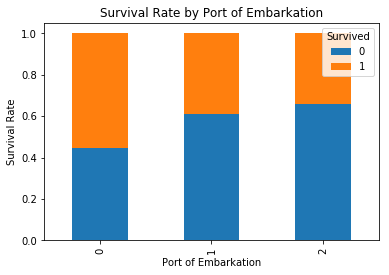

In [719]:
embarked_val_xt = pd.crosstab(df_train['Embarked_Val'], df_train['Survived'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

In [720]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked'], prefix='Embarked_Val')], axis=1)
df_train = df_train.drop(['Embarked', 'Embarked_Val'], axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_Val,Embarked_Val_C,Embarked_Val_Q,Embarked_Val_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,0,0,1


## Feature: Age

填充缺失值。

In [721]:
print('Missing age counts', len(df_train[df_train['Age'].isnull()]))
df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

Missing age counts 177


,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


不同于Embarked用众数填充，对于数值型属性Age，用分组中位数填充。

In [722]:
# 创建新列AgeFill，保留原‘Age’列
df_train['AgeFill'] = df_train['Age']
# 按照'Sex_Val'和'Pclass'分组，分别求解年龄中位数，并用对应中位数填充缺失值
print(df_train['AgeFill'].groupby([df_train['Sex_Val'], \
                                   df_train['Pclass']]).median())
df_train['AgeFill'] = df_train['AgeFill'] \
                        .groupby([df_train['Sex_Val'], df_train['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))
print("Missing age counts: ", len(df_train[df_train['AgeFill'].isnull()])) 

Sex_Val  Pclass
0        1         35.0
         2         28.0
         3         21.5
1        1         40.0
         2         30.0
         3         25.0
Name: AgeFill, dtype: float64
Missing age counts:  0


分析AgeFill对存活率的影响。

/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0,0.5,'Age')

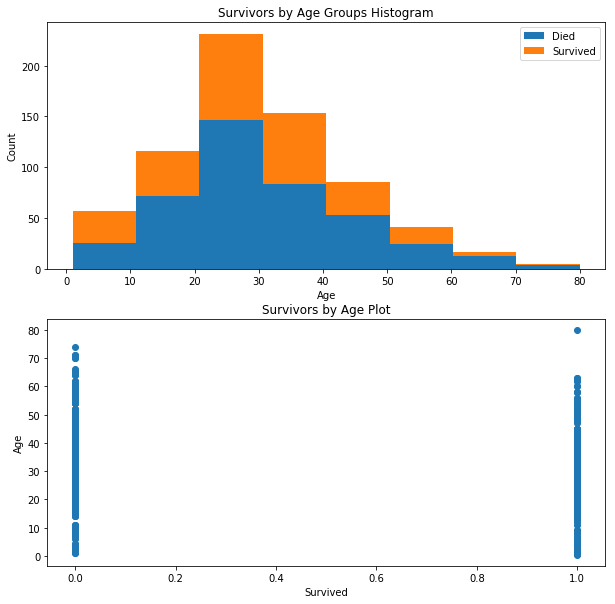

In [723]:
# Set up a grid of plots
fig, axes = plt.subplots(2, 1, figsize=fizsize_with_subplots)

# Histogram of AgeFill segmented by Survived
df1 = df_train[df_train['Survived'] == 0]['Age']
df2 = df_train[df_train['Survived'] == 1]['Age']
max_age = max(df_train['AgeFill'])
axes[0].hist([df1, df2], 
             bins=int(max_age / bin_size), 
             range=(1, max_age), 
             stacked=True)
axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Scatter plot Survived and AgeFill
axes[1].scatter(df_train['Survived'], df_train['AgeFill'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')

(Age, Survived)交叉表显示的信息对数据分析没有什么明显的启发。

对不同Pclass下的年龄分布密度进行描述。

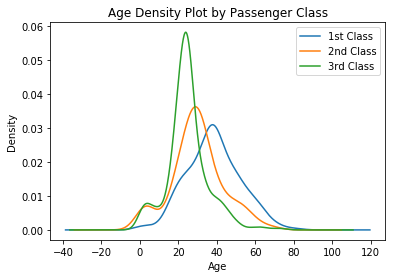

In [724]:
# kernel density estimation
# 相对直方图而言，用更加平滑的曲线绘制各仓位级别的年龄分布
for pclass in passenger_classes:
    df_train["AgeFill"][df_train.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

1st class乘客年龄大体大于2ed 和 3rd。

我们还可以探索存活率与船舱等级、年龄、性别的关系。

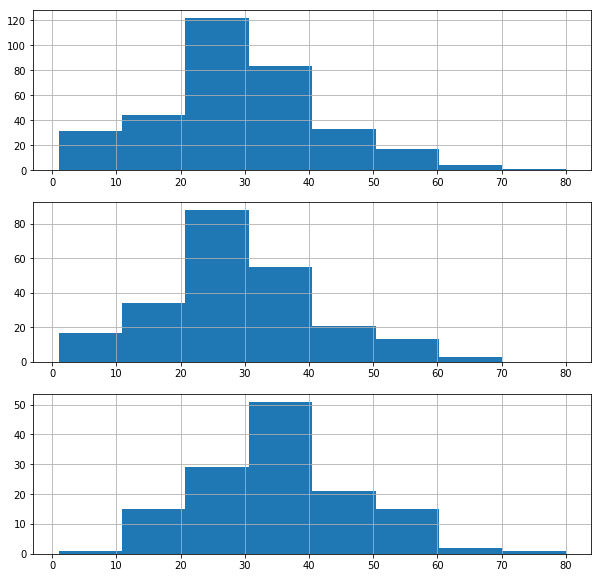

In [725]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 1)

# Plot the AgeFill histogram for Survivors
plt.subplot2grid(fig_dims, (0, 0))
survived_df = df_train[df_train['Survived'] == 1]
survived_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))

# Plot the AgeFill histogram for Females
plt.subplot2grid(fig_dims, (1, 0))
females_df = df_train[(df_train['Sex_Val'] == 0) & (df_train['Survived'] == 1)]
females_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))

# Plot the AgeFill histogram for first class passengers
plt.subplot2grid(fig_dims, (2, 0))
class1_df = df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)]
class1_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))

1. 活下来的人年龄最频繁地分布于20-30之间
2. 活下来的女性最频繁地分布于20-30之间
3. 头等舱存活下来的人年龄最频繁地分布于30-40之间。

In [726]:
# 同理，对票价属性'Fare'缺失值进行处理，以均值替代
if len(df_train[df_train['Fare'].isnull()] > 0):
        avg_fare = df_train['Fare'].mean()
        df_train.replace({ None: avg_fare }, inplace=True)

# 汇总属性'SibSp'和'Parch'
# Define a new feature FamilySize that is the sum of 
# Parch (number of parents or children on board) and 
# SibSp (number of siblings or spouses):
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']

## Final Data Preparation for Machine Learning
前面的数据分析中，主要确定以下信息：
* 哪些属性重要，需要保留
* 缺失值填充
* 由于我们使用sklearn中的RandomForest分类器，模型拟合的训练数据类型要求为ndarray，因此处理了非数值型数据转化

对于原始数据表格，将'object' (strings)类型的属性移除，因为我们已经在数据EDA中创建了这些属性的数值替代。

移除不需要的属性
* Age由AgeFill替代.
* SibSp and Parch columns由FamilySize替代.
* 移除PassengerId.
* 移除Embarked_Val用哑变量替代.

In [727]:
# Drop the columns we won't use:
df_train = df_train.drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin'], axis=1)
    
    # Drop the Age column since we will be using the AgeFill column instead.
    # Drop the SibSp and Parch columns since we will be using FamilySize.
    # Drop the PassengerId column since it won't be used as a feature.
df_train = df_train.drop(['Age', 'SibSp', 'Parch'], axis=1)
    # Fill in missing values of Fare with the average Fare


将DataFrame转换为numpy array，训练数据就准备好了。

In [728]:
print(df_train.columns)
train_data = df_train.values
train_data.shape

Index(['Survived', 'Pclass', 'Fare', 'Sex_Val', 'Embarked_Val_C',
       'Embarked_Val_Q', 'Embarked_Val_S', 'AgeFill', 'FamilySize'],
      dtype='object')


(891, 9)

## 数据整理（Data Wrangling）总结

将数据准备和清理过程封装（后面还需要对测试数据做同样的处理）。

In [741]:
def clean_data(df, drop_passenger_id):
    
    # Get the unique values of Sex
    sexes = sorted(df['Sex'].unique())
    
    # Generate a mapping of Sex from a string to a number representation    
    genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))

    # Transform Sex from a string to a number representation
    df['Sex_Val'] = df['Sex'].map(genders_mapping)
    
    #测试性将Embarked属性转为数据，后丢弃，转而将其转换为哑变量
#     embarked_locs = sorted(df['Embarked'].fillna("missing").unique())
    

#     # Generate a mapping of Embarked from a string to a number representation        
#     embarked_locs_mapping = dict(zip(embarked_locs, 
#                                      range(0, len(embarked_locs) + 1)))
    
#     # Fill in missing values of Embarked
#     # Since the vast majority of passengers embarked in 'S': 3, 
#     # we assign the missing values in Embarked to 'S':
#     if len(df[df['Embarked'].isnull()] > 0):
#         df.replace({'Embarked_Val' : 
#                        { embarked_locs_mapping["missing"] : embarked_locs_mapping['S'] 
#                        }
#                    }, 
#                    inplace=True)
        
    # Transform Embarked from a string to dummy variables
    df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked_Val')], axis=1)
    
    
    # Fill in missing values of Fare with the average Fare
    if len(df[df['Fare'].isnull()] > 0):
        avg_fare = df['Fare'].mean()
        df.replace({ None: avg_fare}, inplace=True)
    
    # To keep Age in tact, make a copy of it called AgeFill 
    # that we will use to fill in the missing ages:
    df['AgeFill'] = df['Age']

    # Determine the Age typical for each passenger class by Sex_Val.  
    # We'll use the median instead of the mean because the Age 
    # histogram seems to be right skewed.
    df['AgeFill'] = df['AgeFill'] \
                        .groupby([df['Sex_Val'], df['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))
            
    # Define a new feature FamilySize that is the sum of 
    # Parch (number of parents or children on board) and 
    # SibSp (number of siblings or spouses):
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    # Drop the columns we won't use:
    df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
    
    # Drop the Age column since we will be using the AgeFill column instead.
    # Drop the SibSp and Parch columns since we will be using FamilySize.
    # Drop the PassengerId column since it won't be used as a feature.
    df = df.drop(['Age', 'SibSp', 'Parch'], axis=1)
    
    if drop_passenger_id:
        df = df.drop(['PassengerId'], axis=1)
    
    return df

## Random Forest: Training

In [742]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

利用初始化好的模型clf拟合训练数据

In [748]:
# Training data features, skip the first column 'Survived'
train_features = train_data[:, 1:]

# 'Survived' column values
train_target = train_data[:, 0]

# Fit the model to our training data
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0}".format(score)

891


'Mean accuracy of Random Forest: 0.9809203142536476'

## Random Forest: Predicting

用训练好的模型预测测试数据的类别标记

In [744]:
# Data wrangle the test set and convert it to a numpy array
df_test = pd.read_csv('./titanic-data/test.csv')
df_test = clean_data(df_test, drop_passenger_id=False)
print('feature names after cleaning', df_test.columns)
test_data = df_test.values

feature names after cleaning Index(['PassengerId', 'Pclass', 'Fare', 'Sex_Val', 'Embarked_Val_C',
       'Embarked_Val_Q', 'Embarked_Val_S', 'AgeFill', 'FamilySize'],
      dtype='object')


In [758]:
# Get the test data features, skipping the first column 'PassengerId'
test_x = test_data[:, 1:]
# Predict the Survival values for the test data
test_y = clf.predict(test_x)
score = clf.score(test_x, test_y)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 1.0'

## 评估模型准确率

随机划分'train.csv'中的数据，80%用作训练数据，20%用作测试数据。

In [759]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split

# 随机划分数据集
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 8) (891,)
(712, 8) (712,)
(179, 8) (179,)


Use the new training data to fit the model, predict, and get the accuracy score:

In [760]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %0.2f" %accuracy_score(test_y, predict_y))

Accuracy = 0.84


二分类混淆矩阵

精确度（Precision）、召回率（Recall），和F1评分计算。

$$Precision = \frac{TP}{TP + FP}$$ 

$$Recall = \frac{TP}{TP + FN}$$ 

$$F1 = \frac{2TP}{2TP + FP + FN}$$ 

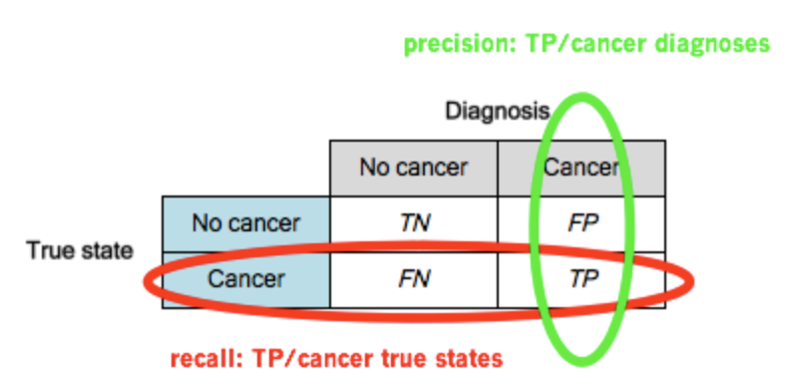

In [761]:
from IPython.core.display import Image 
Image(filename='./titanic-data/confusion_matrix.png', width=800)

* precision 越大，FP越小，表示误诊率越小
* recall越大，FN越小，表示漏诊率越小

打印测试集上的准确率和混淆矩阵

In [762]:
model_score = clf.score(test_x, test_y)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.84 

Confusion Matrix  [[100  10]
 [ 19  50]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 100 |  10 |
Actual   |-----|-----|
       1 |  19 |  50 |
         |-----|-----|


In [755]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            predict_y, 
                            target_names=['Not Survived', 'Survived']))

print('Predicted Positive counts:', predict_y.tolist().count(1)) 
print('True Positive counts:', test_y.tolist().count(1))

              precision    recall  f1-score   support

Not Survived       0.84      0.91      0.87       110
    Survived       0.83      0.72      0.78        69

 avg / total       0.84      0.84      0.84       179

Predicted Positive counts: 60
True Positive counts: 69


多类别情况的计算方法（以上述混淆矩阵为例）

单独考虑每个类别，分对为TP，将其他任何类错分为该类为FP，将该类错分为任何类为FN
* 对类别0， TP=100, FP=19, FN=10, presicion=100/(100+19)=0.84, recall=100/(100+10)=0.91
* 对类别1， TP=50, FP=10, FN=19, precision=50/(50+10)=0.83, recall=50/(50+19)=0.72